# **Previewing the data**

- Recall that we can use the select_dtypes method to filter any non-numeric data. 
- Chaining dot-head allows us to preview these columns in our salaries DataFrame, showing columns such as Designation, Experience, Employment_Status, and Company_Size.

In [ ]:
print(salaries.select_dtypes("object").head())

In [ ]:
| Designation               | Experience | Employment_Status | Employee_Location | Company_Size |
|---------------------------|------------|-------------------|-------------------|--------------|
| Data Scientist            | Mid        | FT                | DE                | L            |
| Machine Learning Scientist| Senior     | FT                | JP                | S            |
| Big Data Engineer         | Senior     | FT                | GB                | M            |
| Product Data Analyst      | Mid        | FT                | HN                | S            |
| Machine Learning Engineer | Senior     | FT                | US                | L            |


Let's examine frequency of values in the Designation column. The output is truncated by pandas automatically since there are so many different job titles!

In [ ]:
print(salaries["Designation"].value_counts())

In [ ]:
| Designation                   | Count |
|-------------------------------|-------|
| Data Scientist                | 143   |
| Data Engineer                 | 132   |
| Data Analyst                  | 97    |
| Machine Learning Engineer     | 41    |
| Research Scientist            | 16    |
| Data Science Manager          | 12    |
| Data Architect                | 11    |
| Big Data Engineer             | 8     |
| Machine Learning Scientist    | 8     |
| ...                           | ...   |


We can count how many unique job titles there are using pandas dot-nunique method. There are 50 in total!

In [ ]:
print(salaries["Designation"].nunique())

In [ ]:
50

However, the fifth most popular job title, Research Scientist, appears less than 20 times.

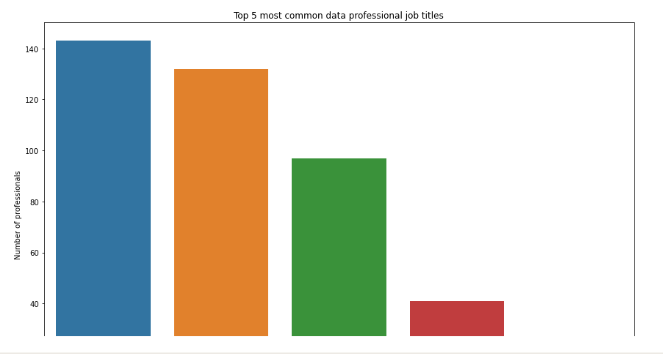

# **Extracting value from categories**

- The current format of the data limits our ability to generate insights. 
- We can use the pandas series-dot-string-dot-contains method, which allows us to search a column for a specific string or multiple strings. 
- Say we want to know which job titles have Scientist in them. 
- We use the string-dot-contains method on the Designation column, passing the word Scientist. 
- This returns True or False values depending on whether the row contains this word.

- Current format limits our ability generate insights
- `pandas.Series.str.contains()`
  - Search a column for a specific string or multiple strings

In [ ]:
salaries["Designation"].str.contains("Scientist")

In [ ]:
| Index | Designation |
|-------|-------------|
| 0     | True        |
| 1     | True        |
| 2     | False       |
| 3     | False       |
| ...   | ...         |
| 604   | False       |
| 605   | False       |
| 606   | True        |
| Name: Designation, Length: 607, dtype: bool 

# **Finding multiple phrases in strings**

- What if we want to filter for rows containing one or more phrases? 
- Say we want to find job titles containing either Machine Learning or AI. 
- We use the string-dot-contains method again, but this time we include a pipe between our two phrases. 
- This will return True if an observation in the Designation column contains Machine Learning or AI, or false if neither of these phrases are present! 
- Notice that we avoid spaces before or after the pipe - if we included spaces then string-dot-contains will only capture values that have a space, which isn't necessary for us in this case. 
- Again we are returned the Boolean results.

- Words of interest: Machine Learning or AI

In [ ]:
salaries["Designation"].str.contains("Machine Learning|AI")

In [ ]:
| Index | Designation |
|-------|-------------|
| 0     | False       |
| 1     | True        |
| 2     | False       |
| 3     | False       |
| ...   | ...         |
| 604   | False       |
| 605   | False       |
| 606   | True        |
| Name: Designation, Length: 607, dtype: bool 

- What if we wanted to filter for job titles that start with a specific phrase such as "Data"? 
- We use the same string-dot-contains method and include the caret symbol to indicate we are looking for this match at the start of the line. 
- This will match titles such as "Data Scientist" but not "Big Data Engineer".

- Words of interest: Any that start with Data

In [ ]:
salaries["Designation"].str.contains("^Data")

In [ ]:
| Index | Designation |
|-------|-------------|
| 0     | True        |
| 1     | False       |
| 2     | False       |
| 3     | False       |
| ...   | ...         |
| 604   | True        |
| 605   | True        |
| 606   | False       |
| Name: Designation, Length: 607, dtype: bool 

- Now we have a sense of how this method works, let's define a list of job titles we want to find. 
- We start by creating a list with the different categories of data roles, which will become the values of a new column in our DataFrame.

In [ ]:
job_categories = ["Data Science", "Data Analytics",
"Data Engineering", "Machine Learning",
"Managerial", "Consultant"]

- We then need to create variables containing our filters. 
- We will look for Data Scientist or NLP for data science roles. 
- We'll use Analyst or Analytics for data analyst roles. 
- We repeat this for data engineer, machine learning engineer, managerial, and consultant roles.

In [ ]:
data_science = "Data Scientist | NLP"
data_analyst = "Analyst | Analytics"
data_engineer = "Data Engineer | ETL | Architect | Infrastructure"
ml_engineer = "Machine Learning | ML | Big Data | AI"
manager = "Manager | Head | Director | Lead | Principal | Staff"
consultant = "Consultant | Freelance"

- The next step is to create a list with our range of conditions for the string-dot-contains method. 
- We add data science, data analyst, data engineer, and all remaining roles, remembering to close our list.

In [ ]:
conditions = [
    (salaries["Designation"].str.contains(data_science)),  # Using the variable
    (salaries["Designation"].str.contains(data_analyst)),
    (salaries["Designation"].str.contains(data_engineer)),
    (salaries["Designation"].str.contains(ml_engineer)),
    (salaries["Designation"].str.contains(manager)),
    (salaries["Designation"].str.contains(consultant))
]

- Finally, we can create our new Job_Category column by using NumPy's dot-select function.

In [ ]:
salaries["Job_Category"] = np.select(conditions, job_categories, default="Other")

- It takes a list of conditions as the first argument,
- followed by a list of arrays to search for the conditions in.
- By using an argument called default, we tell NumPy to assign "Other" when a value in our conditions list is not found.

**Previewing job categories**

- Previewing the Designation and our new Job_Category columns, we can sense check the first five values. All looks good!

In [ ]:
print(salaries[["Designation", "Job_Category"]].head())

In [ ]:
| Designation                  | Job_Category       |
|------------------------------|--------------------|
| Data Scientist               | Data Science       |
| Machine Learning Scientist   | Machine Learning   |
| Big Data Engineer            | Data Engineering   |
| Product Data Analyst         | Data Analytics     |
| Machine Learning Engineer    | Machine Learning   |

**Visualizing job category frequency**

- With our new column, we can visualize how many jobs fall under each category. 
- For this, we use Seaborn's countplot, passing our DataFrame to the data keyword argument and the Job_Category column to x. 
- We call p-l-t-dot-show to display the plot. We can see Data Science, Engineer, and Analyst roles are by far the most popular! 
- There aren't many roles categorized as Other, suggesting we captured the majority of our data roles appropriately!

In [ ]:
sns.countplot(data=salaries, x="Job_Category")
plt.show()

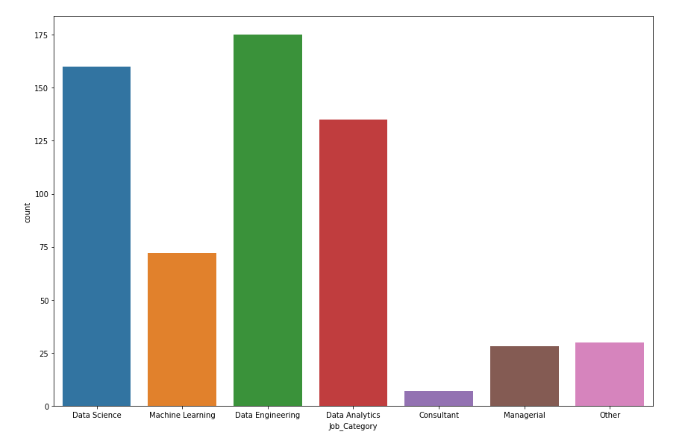